In [6]:
import pandas as pd

data = pd.read_stata("C:/Users/Usuario/OneDrive/Escritorio/CIDE/Intro a ciencia de datos\SalariosResiduales.dta")
data.head()

,Año,MTL,Identmun_1990,Id_persona,Num_persona,Factor_persona,Sexo,Edad,Escolaridad,Real_Ingreso,LogIngreso,ResIngresoEdad,ResIngresoEdadEduc
0,1990,1,17,199000000000000000001,1.0,10,1,35 to 39,1,3747.696533,8.228897,-0.439978,-0.193100
1,1990,1,17,199000000000000000008,1.0,10,1,30 to 34,4,32123.113281,10.377331,1.704954,1.989805
2,1990,1,17,199000000000000000013,1.0,10,1,45 to 49,99,6424.622559,8.767893,0.176749,NaN
3,1990,1,17,199000000000000000020,1.0,10,1,20 to 24,3,5353.852051,8.585571,0.178005,0.368736
4,1990,1,17,199000000000000000024,1.0,10,1,20 to 24,3,3480.003906,8.154789,-0.252777,-0.062047


In [7]:
data

,Año,MTL,Identmun_1990,Id_persona,Num_persona,Factor_persona,Sexo,Edad,Escolaridad,Real_Ingreso,LogIngreso,ResIngresoEdad,ResIngresoEdadEduc
0,1990,1,17,199000000000000000001,1.0,10,1,35 to 39,1,3747.696533,8.228897,-0.439978,-0.193100
1,1990,1,17,199000000000000000008,1.0,10,1,30 to 34,4,32123.113281,10.377331,1.704954,1.989805
2,1990,1,17,199000000000000000013,1.0,10,1,45 to 49,99,6424.622559,8.767893,0.176749,NaN
3,1990,1,17,199000000000000000020,1.0,10,1,20 to 24,3,5353.852051,8.585571,0.178005,0.368736
4,1990,1,17,199000000000000000024,1.0,10,1,20 to 24,3,3480.003906,8.154789,-0.252777,-0.062047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22550124,2020,36,2449,202032058000084400004,1.0,1,1,30 to 34,9,1200.000000,7.090077,-1.753117,-1.661947
22550125,2020,36,2449,202032058000084500002,2.0,1,1,50 to 54,15,NaN,NaN,NaN,NaN
22550126,2020,36,2449,202032058000084600001,1.0,1,1,50 to 54,9,3440.000000,8.143227,-0.648406,-0.632608
22550127,2020,36,2449,202032058000084700001,1.0,1,1,25 to 29,12,6450.000000,8.771835,-0.002209,0.068576


In [8]:
#visualizar todos los rangos de edades que tiene edad
data['Edad'].unique()

['35 to 39', '30 to 34', '45 to 49', '20 to 24', '25 to 29', ..., '65 to 69', '55 to 59', '50 to 54', '40 to 44', '75 to 79']
Length: 15
Categories (14, object): ['15 to 19' < '20 to 24' < '25 to 29' < '30 to 34' ... '65 to 69' < '70 to 74' < '75 to 79' < '80+']

In [9]:
#agrupar por mtl y año
agrupada = data.groupby(['MTL', 'Año']).agg({'ResIngresoEdadEduc': 'mean'}).reset_index()

agrupada

,MTL,Año,ResIngresoEdadEduc
0,1,1990,0.034720
1,1,2000,0.086496
2,1,2010,-0.032790
3,1,2015,-0.002605
4,1,2020,0.041689
...,...,...,...
3877,777,1990,0.032568
3878,777,2000,-0.631117
3879,777,2010,-0.584097
3880,777,2015,-0.576024


In [10]:
#promedio nacional por año
national = agrupada.groupby('Año')['ResIngresoEdadEduc'].mean().reset_index()
national = national.rename(columns={'ResIngresoEdadEduc': 'PromedioNacional'})

# Merge con base por MTL
agrupada = agrupada.merge(national, on='Año')
agrupada

,MTL,Año,ResIngresoEdadEduc,PromedioNacional
0,1,1990,0.034720,-0.408565
1,1,2000,0.086496,-0.341891
2,1,2010,-0.032790,-0.331748
3,1,2015,-0.002605,-0.308460
4,1,2020,0.041689,-0.292032
...,...,...,...,...
3877,777,1990,0.032568,-0.408565
3878,777,2000,-0.631117,-0.341891
3879,777,2010,-0.584097,-0.331748
3880,777,2015,-0.576024,-0.308460


In [11]:
#distancia entre el promedio nacional y el promedio por MTL
agrupada['Brecha'] = abs(agrupada['ResIngresoEdadEduc'] - agrupada['PromedioNacional'])
agrupada

,MTL,Año,ResIngresoEdadEduc,PromedioNacional,Brecha
0,1,1990,0.034720,-0.408565,0.443286
1,1,2000,0.086496,-0.341891,0.428387
2,1,2010,-0.032790,-0.331748,0.298958
3,1,2015,-0.002605,-0.308460,0.305855
4,1,2020,0.041689,-0.292032,0.333721
...,...,...,...,...,...
3877,777,1990,0.032568,-0.408565,0.441133
3878,777,2000,-0.631117,-0.341891,0.289227
3879,777,2010,-0.584097,-0.331748,0.252349
3880,777,2015,-0.576024,-0.308460,0.267565


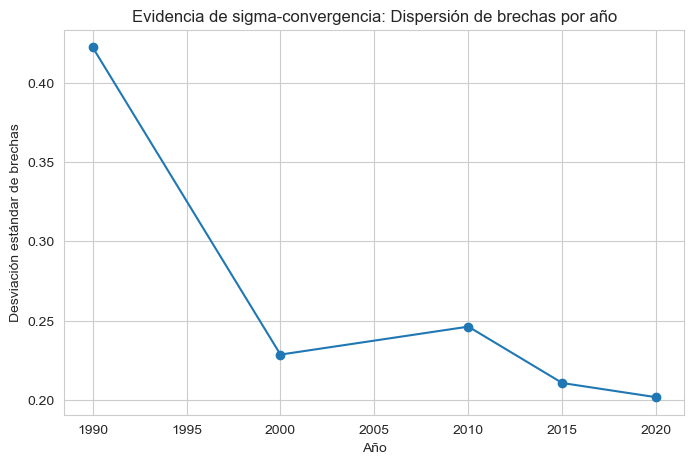

In [12]:
import matplotlib.pyplot as plt

# Calcular la desviación estándar de 'Brecha' por año
sigma = agrupada.groupby('Año')['Brecha'].std().reset_index()
sigma = sigma.dropna()
# Graficar la desviación estándar de 'Brecha' por año
plt.figure(figsize=(8, 5))
plt.plot(sigma['Año'], sigma['Brecha'], marker='o', linestyle='-')

plt.title("Evidencia de sigma-convergencia: Dispersión de brechas por año")
plt.xlabel("Año")
plt.ylabel("Desviación estándar de brechas")
plt.grid(True)
plt.show()

#Si la dispersión baja con el tiempo → hay convergencia agregada.


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

slopes = []

for mtl in agrupada['MTL'].unique():
    df_mtl = agrupada[agrupada['MTL'] == mtl]
    
    df_mtl = df_mtl.dropna(subset=['Brecha'])
    
    # Verificar que haya suficientes datos para realizar la regresión
    if len(df_mtl) > 1:
        X = df_mtl['Año'].values.reshape(-1, 1)
        y = df_mtl['Brecha'].values
        
        # Aplicar regresión lineal
        reg = LinearRegression().fit(X, y)
        slopes.append({'MTL': mtl, 'Pendiente': reg.coef_[0]})
    else:
        slopes.append({'MTL': mtl, 'Pendiente': np.nan})  # Indicar que no hay suficientes datos

pendientes_df = pd.DataFrame(slopes)
print(pendientes_df)

##Interpretación:
#Pendiente < 0 → convergencia sostenida
#Pendiente > 0 → divergencia


     MTL  Pendiente
0      1  -0.004918
1      2  -0.002817
2      3   0.001261
3      4  -0.000674
4      5  -0.003009
..   ...        ...
772  773  -0.005499
773  774  -0.007664
774  775  -0.004020
775  776  -0.002956
776  777   0.000288

[777 rows x 2 columns]


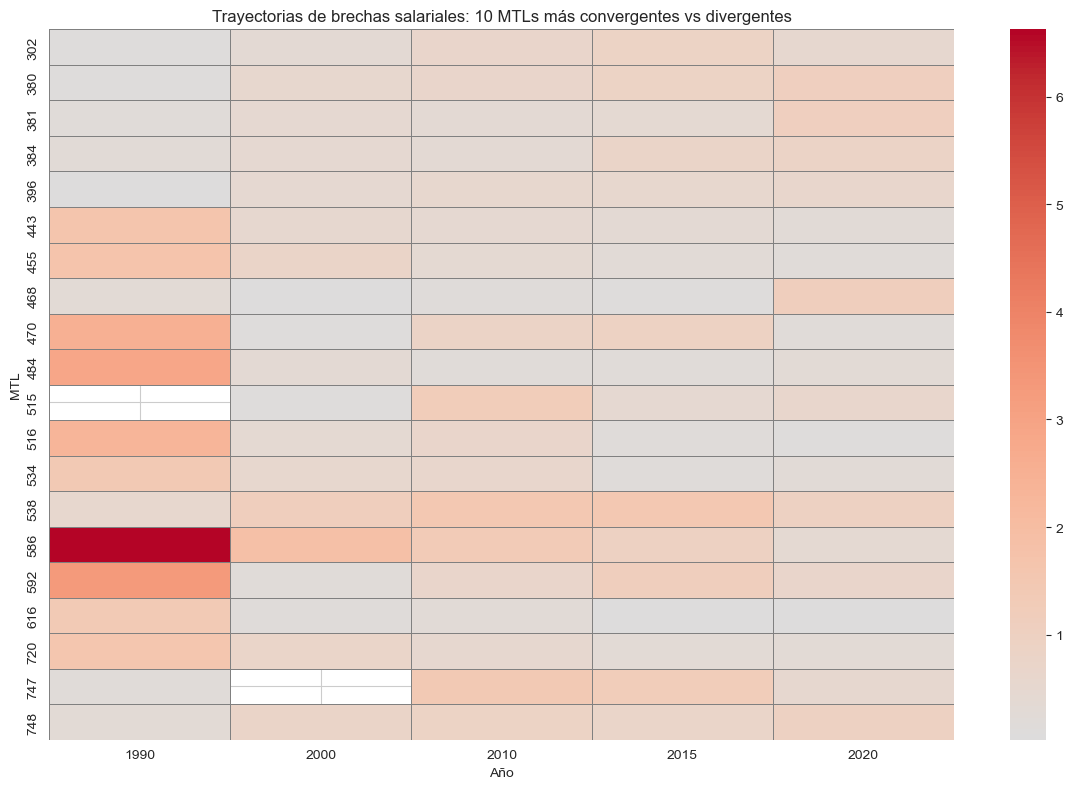

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#unir pendiente al dataframe de brechas
agrupada_pendiente = agrupada.merge(pendientes_df, on='MTL')

# Seleccionar los 10 más convergentes y 10 más divergentes
top_convergentes = pendientes_df.sort_values('Pendiente').head(10)['MTL']
top_divergentes = pendientes_df.sort_values('Pendiente').tail(10)['MTL']
seleccionados = pd.concat([top_convergentes, top_divergentes])

# Filtrar base
heat_subset = agrupada_pendiente[agrupada_pendiente['MTL'].isin(seleccionados)]

# Pivot para heatmap
heatmap_data = heat_subset.pivot(index='MTL', columns='Año', values='Brecha')

# Crear heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, linewidths=0.5, linecolor='gray')
plt.title("Trayectorias de brechas salariales: 10 MTLs más convergentes vs divergentes")
plt.xlabel("Año")
plt.ylabel("MTL")
plt.tight_layout()
plt.show()


In [15]:
## Para comparar la distancia en el primer y último año disponible. Si la distancia disminuyó, asumimos convergencia.

dist_inicial = agrupada.sort_values('Año').groupby('MTL').first().reset_index()
dist_final = agrupada.sort_values('Año').groupby('MTL').last().reset_index()

# Merge para comparar
convergencia = dist_inicial[['MTL', 'Brecha']].merge(
    dist_final[['MTL', 'Brecha']],
    on='MTL',
    suffixes=('_inicio', '_fin')
)
convergencia

,MTL,Brecha_inicio,Brecha_fin
0,1,0.443286,0.333721
1,2,0.168991,0.132349
2,3,0.025236,0.128266
3,4,0.370801,0.420353
4,5,0.444923,0.385198
...,...,...,...
772,773,0.701216,0.477757
773,774,0.806131,0.519022
774,775,0.657069,0.522118
775,776,0.749392,0.684394


In [16]:
# para evaluar convergencia
convergencia['Convergente'] = convergencia['Brecha_fin'] < convergencia['Brecha_inicio']
convergencia

,MTL,Brecha_inicio,Brecha_fin,Convergente
0,1,0.443286,0.333721,True
1,2,0.168991,0.132349,True
2,3,0.025236,0.128266,False
3,4,0.370801,0.420353,False
4,5,0.444923,0.385198,True
...,...,...,...,...
772,773,0.701216,0.477757,True
773,774,0.806131,0.519022,True
774,775,0.657069,0.522118,True
775,776,0.749392,0.684394,True


In [17]:
prop_convergentes = convergencia['Convergente'].mean()
print(f"Proporción de MTLs que convergieron: {prop_convergentes}")

Proporción de MTLs que convergieron: 0.7014157014157014


In [18]:
print(data['MTL'].count())
print(data['MTL'].nunique())

22550129
777


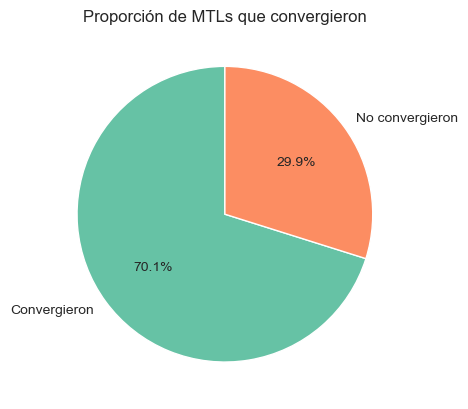

In [19]:
#gráfico de proporción de MTLs que convergieron
convergencia['Convergente'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Convergieron', 'No convergieron'], colors=['#66c2a5','#fc8d62'],
    startangle=90, ylabel='', title='Proporción de MTLs que convergieron')
plt.show()


In [20]:
convergencia['CambioBrecha'] = convergencia['Brecha_inicio'] - convergencia['Brecha_fin']
top_convergentes = convergencia.sort_values('CambioBrecha', ascending=False).head(10)['MTL']
top_divergentes = convergencia.sort_values('CambioBrecha').head(10)['MTL']

In [21]:
# Número total de MTLs
#mtls = heat.index.tolist()
#n = len(mtls)
#chunk_size = n // 6
#for i in range(6):
 #   subset = heat.iloc[i*chunk_size:(i+1)*chunk_size]
  #  plt.figure(figsize=(10, 6))
   # sns.heatmap(subset, cmap='coolwarm', center=0)
    #plt.title(f"Mapa de calor de brechas salariales (MTLs {i*chunk_size+1}–{(i+1)*chunk_size})")
    #plt.xlabel("Año")
    #plt.ylabel("MTL")
    #plt.tight_layout()
    #plt.show()


In [22]:
# Filtrar solo los años de interés
#años_interes = [2000, 2010, 2020]
#heat_filtrado = heat[años_interes]

# Número total de MTLs
#mtls = heat_filtrado.index.tolist()
#n = len(mtls)
#chunk_size = n // 6

# Graficar en 6 bloques
#for i in range(6):
 #   subset = heat_filtrado.iloc[i*chunk_size:(i+1)*chunk_size]
  #  plt.figure(figsize=(8, 6))
   # sns.heatmap(subset, cmap='coolwarm', center=0, annot=False)
    #plt.title(f"Mapa de calor de brechas salariales\n(MTLs {i*chunk_size+1}–{(i+1)*chunk_size})")
    #plt.xlabel("Año")
    #plt.ylabel("MTL")
    #plt.tight_layout()
    #plt.show()

## ¿Qué sectores han concentrado los salarios promedio más altos en México entre 1990 y 2020?

In [23]:
data_2 = pd.read_stata("C:/Users/Usuario/OneDrive/Escritorio/CIDE/Intro a ciencia de datos/Tasa_Crecimiento_Industria_Nacional.dta")
data_2

,Año,Ind3D,EmpN1,SalRN1,LogEmpN1,LogSalRN1,DEmpN1,DSalRN1
0,1990,111,4324100,3886.719174,15.279715,8.265321,NaN,NaN
1,2000,111,4595226,2954.143242,15.340528,7.990964,0.060814,-0.274357
2,2010,111,4685506,3883.810168,15.359984,8.264572,0.019456,0.273608
3,2015,111,3990695,3665.648494,15.199476,8.206760,-0.160508,-0.057812
4,2020,111,4451144,4205.124836,15.308672,8.344059,0.109196,0.137299
...,...,...,...,...,...,...,...,...
515,1990,999,786610,7542.540679,13.575488,8.928314,NaN,NaN
516,2000,999,817037,8074.144931,13.613440,8.996422,0.037951,0.068108
517,2010,999,558724,9533.464658,13.233411,9.162563,-0.380029,0.166142
518,2015,999,723203,7938.452074,13.491446,8.979473,0.258035,-0.183090


In [24]:
data_2['Ind3D'].unique()
print(data_2['Ind3D'].nunique())
#contar na's en SalRN1
print(data_2['SalRN1'].isna().sum())
#eliminar observaciones con na's
data_2 = data_2.dropna(subset=['SalRN1'])

104
19


In [25]:
#tomar promedio por Ind3D y año
data_2 = data_2.groupby(['Ind3D', 'Año']).agg({'SalRN1': 'mean'}).reset_index()

In [26]:
print(data_2['Ind3D'].nunique())
data_2
print(data_2['Ind3D'].isna().sum())

104
0


In [27]:
#dataframes separados por 1990, 2000, 2010, 2015 y finalmente 2020
data_2_1990 = data_2[data_2['Año'] == 1990]
data_2_2000 = data_2[data_2['Año'] == 2000]
data_2_2010 = data_2[data_2['Año'] == 2010]
data_2_2015 = data_2[data_2['Año'] == 2015]
data_2_2020 = data_2[data_2['Año'] == 2020]

In [28]:
data_2_2000

,Ind3D,Año,SalRN1
1,111,2000,2954.143242
6,112,2000,4552.936659
11,113,2000,3270.804386
16,114,2000,4717.795013
21,115,2000,5003.037835
...,...,...,...
478,814,2000,2875.254849
483,931,2000,8409.297299
488,932,2000,12919.294580
493,939,2000,10525.666960


In [29]:
#rankear Ind3D por SalRN1 
data_2_1990['Rank'] = data_2.groupby('Año')['SalRN1'].rank(method='first', ascending=False)
data_2_2000['Rank'] = data_2.groupby('Año')['SalRN1'].rank(method='first', ascending=False)
data_2_2010['Rank'] = data_2.groupby('Año')['SalRN1'].rank(method='first', ascending=False)
data_2_2015['Rank'] = data_2.groupby('Año')['SalRN1'].rank(method='first', ascending=False)
data_2_2020['Rank'] = data_2.groupby('Año')['SalRN1'].rank(method='first', ascending=False)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\3100166860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_1990['Rank'] = data_2.groupby('Año')['SalRN1'].rank(method='first', ascending=False)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\3100166860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_2000['Rank'] = data_2.groupby('Año')['SalRN1'].rank(method='first', ascending=False)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\3100166860.py:4: SettingWithCopyWarning: 
A va

In [47]:
#filtrar solo los 10 sectores con salarios más altos
data_2_1990 = data_2_1990[data_2_1990['Rank'] <= 10]
data_2_2000 = data_2_2000[data_2_2000['Rank'] <= 10]
data_2_2010 = data_2_2010[data_2_2010['Rank'] <= 10]
data_2_2015 = data_2_2015[data_2_2015['Rank'] <= 10]
data_2_2020 = data_2_2020[data_2_2020['Rank'] <= 10]

In [37]:
data_2_1990 
##211: Extracción de petróleo y gas
##481: Transporte aéreo
##512: Producción de películas y videos
##518: Servicios de datos y alojamiento de sitios web 
##523: Servicios de apoyo a las actividades de los servicios financieros; mercados financieros y casas de bolsa
##524: Servicios de seguros y fianzas
##529: otros servicios financieros
##531: Servicios inmobiliarios y de alquiler de bienes muebles e intangibles
##541: Servicios profesionales, científicos y técnicos
##932: Servicios de administración pública

,Ind3D,Año,SalRN1,Rank
30,211,1990,12567.813814,10.0
266,481,1990,17043.998986,2.0
327,512,1990,14064.522245,6.0
341,518,1990,13597.445329,7.0
360,523,1990,17253.205940,1.0
365,524,1990,14528.503303,4.0
370,529,1990,14449.244945,5.0
375,531,1990,13311.622127,8.0
395,541,1990,12986.897363,9.0
487,932,1990,16625.931480,3.0


In [39]:
#para poner correspondencia entre Ind3D y nombre del sector
sector_mapping = {
    211: "Extracción de petróleo y gas",
    213: "Servicios mineros",
    324: "Derivados petróleo y carbón",
    481: "Transporte aéreo",
    483: "Transporte marítimo",
    486: "Transporte de gas por ductos",
    512: "Producción audiovisual",
    518: "Servicios de procesamiento de datos",
    521: "Intermediación financiera",
    522: "Banca de desarrollo",
    523: "Mercados financieros y casas de bolsa",
    524: "Servicios de seguros y fianzas",
    529: "Otros servicios financieros",
    531: "Servicios inmobiliarios",
    533: "Alquiler de bienes muebles",
    541: "Servicios profesionales, científicos y técnicos",
    551: "Corporativos",
    932: "Administración pública"
}
data_2_1990['Sector'] = data_2_1990['Ind3D'].map(sector_mapping)
data_2_1990

,Ind3D,Año,SalRN1,Rank,Sector
30,211,1990,12567.813814,10.0,Extracción de petróleo y gas
266,481,1990,17043.998986,2.0,Transporte aéreo
327,512,1990,14064.522245,6.0,Producción audiovisual
341,518,1990,13597.445329,7.0,Servicios de procesamiento de datos
360,523,1990,17253.205940,1.0,Mercados financieros y casas de bolsa
365,524,1990,14528.503303,4.0,Servicios de seguros y fianzas
370,529,1990,14449.244945,5.0,Otros servicios financieros
375,531,1990,13311.622127,8.0,Servicios inmobiliarios
395,541,1990,12986.897363,9.0,"Servicios profesionales, científicos y técnicos"
487,932,1990,16625.931480,3.0,Administración pública


In [40]:
data_2_2000 
##211: Extracción de petróleo y gas
##213: Servicios mineros
##324: Derivados petróleo y carbón
##481: Transporte aéreo
##521: Instituciones de intermediación crediticia y financiera
##522: Banca de desarrollo y servicios financieros
##523: Servicios de apoyo a las actividades de los servicios financieros; mercados financieros y casas de bolsa
##529: otros servicios financieros
##533: Servicios de alquiler de bienes muebles e intangibles
##551: Corporativos

,Ind3D,Año,SalRN1,Rank
31,211,2000,15559.440323,4.0
41,213,2000,14038.033073,7.0
124,324,2000,13155.719015,9.0
267,481,2000,14148.386852,6.0
351,521,2000,16019.994661,3.0
356,522,2000,13221.212645,8.0
361,523,2000,13015.377819,10.0
371,529,2000,16625.244736,2.0
386,533,2000,15195.144800,5.0
400,551,2000,17115.010188,1.0


In [41]:
sector_mapping = {
    211: "Extracción de petróleo y gas",
    213: "Servicios mineros",
    324: "Derivados petróleo y carbón",
    481: "Transporte aéreo",
    521: "Intermediación financiera",
    522: "Banca de desarrollo",
    523: "Mercados financieros y casas de bolsa",
    529: "Otros servicios financieros",
    533: "Alquiler de bienes muebles",
    551: "Corporativos"
}
data_2_2000['Sector'] = data_2_2000['Ind3D'].map(sector_mapping)
data_2_2000

,Ind3D,Año,SalRN1,Rank,Sector
31,211,2000,15559.440323,4.0,Extracción de petróleo y gas
41,213,2000,14038.033073,7.0,Servicios mineros
124,324,2000,13155.719015,9.0,Derivados petróleo y carbón
267,481,2000,14148.386852,6.0,Transporte aéreo
351,521,2000,16019.994661,3.0,Intermediación financiera
356,522,2000,13221.212645,8.0,Banca de desarrollo
361,523,2000,13015.377819,10.0,Mercados financieros y casas de bolsa
371,529,2000,16625.244736,2.0,Otros servicios financieros
386,533,2000,15195.144800,5.0,Alquiler de bienes muebles
400,551,2000,17115.010188,1.0,Corporativos


In [43]:
data_2_2010
sector_mapping = {
    211: "Extracción de petróleo y gas",
    213: "Servicios mineros",
    324: "Derivados petróleo y carbón",
    481: "Transporte aéreo",
    486: "Transporte de gas por ductos",
    521: "Intermediación financiera",
    524: "Servicios de seguros y fianzas",
    529: "Otros servicios financieros",
    551: "Corporativos",
    932: "Administración pública"
}
data_2_2010['Sector'] = data_2_2010['Ind3D'].map(sector_mapping)
data_2_2010

,Ind3D,Año,SalRN1,Rank,Sector
32,211,2010,20513.597007,2.0,Extracción de petróleo y gas
42,213,2010,17572.450751,5.0,Servicios mineros
125,324,2010,16824.614791,6.0,Derivados petróleo y carbón
268,481,2010,16214.069988,8.0,Transporte aéreo
292,486,2010,16773.159867,7.0,Transporte de gas por ductos
352,521,2010,18265.750174,4.0,Intermediación financiera
367,524,2010,14562.524137,9.0,Servicios de seguros y fianzas
372,529,2010,14463.341647,10.0,Otros servicios financieros
401,551,2010,21885.337461,1.0,Corporativos
489,932,2010,19009.864821,3.0,Administración pública


In [45]:
data_2_2015
sector_mapping = {
    211: "Extracción de petróleo y gas",
    213: "Servicios mineros",
    324: "Derivados petróleo y carbón",
    481: "Transporte aéreo",
    486: "Transporte de gas por ductos",
    518: "Servicios de procesamiento de datos",
    521: "Intermediación financiera",
    533: "Alquiler de bienes muebles",
    551: "Corporativos",
    932: "Administración pública"
}
data_2_2015['Sector'] = data_2_2015['Ind3D'].map(sector_mapping)
data_2_2015

,Ind3D,Año,SalRN1,Rank,Sector
33,211,2015,17587.643720,2.0,Extracción de petróleo y gas
43,213,2015,16250.793493,4.0,Servicios mineros
126,324,2015,16446.435968,3.0,Derivados petróleo y carbón
269,481,2015,13582.789458,10.0,Transporte aéreo
293,486,2015,13963.813469,9.0,Transporte de gas por ductos
344,518,2015,15181.402437,7.0,Servicios de procesamiento de datos
353,521,2015,18301.110243,1.0,Intermediación financiera
388,533,2015,15253.852864,6.0,Alquiler de bienes muebles
402,551,2015,13972.876620,8.0,Corporativos
490,932,2015,16151.720833,5.0,Administración pública


In [49]:
data_2_2020
sector_mapping = {
    211: "Extracción de petróleo y gas",
    213: "Servicios mineros",
    324: "Derivados petróleo y carbón",
    481: "Transporte aéreo",
    483: "Transporte marítimo",
    486: "Transporte de gas por ductos",
    521: "Intermediación financiera",
    529: "Otros servicios financieros",
    551: "Corporativos",
    932: "Administración pública"
}
data_2_2020['Sector'] = data_2_2020['Ind3D'].map(sector_mapping)
data_2_2020

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\2137706578.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_2020['Sector'] = data_2_2020['Ind3D'].map(sector_mapping)


,Ind3D,Año,SalRN1,Rank,Sector
34,211,2020,18502.218820,4.0,Extracción de petróleo y gas
44,213,2020,14944.634302,10.0,Servicios mineros
127,324,2020,16036.050345,6.0,Derivados petróleo y carbón
270,481,2020,15011.347001,9.0,Transporte aéreo
280,483,2020,15525.499968,8.0,Transporte marítimo
294,486,2020,17823.269140,5.0,Transporte de gas por ductos
354,521,2020,25922.501348,1.0,Intermediación financiera
374,529,2020,19435.254753,3.0,Otros servicios financieros
403,551,2020,15776.774420,7.0,Corporativos
491,932,2020,21009.802935,2.0,Administración pública


In [56]:
ranks_full = pd.concat([data_2_2000, data_2_1990, data_2_2010, data_2_2015, data_2_2020], ignore_index=True)
ranks_full

,Ind3D,Año,SalRN1,Rank,Sector
0,211,2000,15559.440323,4.0,Extracción de petróleo y gas
1,213,2000,14038.033073,7.0,Servicios mineros
2,324,2000,13155.719015,9.0,Derivados petróleo y carbón
3,481,2000,14148.386852,6.0,Transporte aéreo
4,521,2000,16019.994661,3.0,Intermediación financiera
5,522,2000,13221.212645,8.0,Banca de desarrollo
6,523,2000,13015.377819,10.0,Mercados financieros y casas de bolsa
7,529,2000,16625.244736,2.0,Otros servicios financieros
8,533,2000,15195.144800,5.0,Alquiler de bienes muebles
9,551,2000,17115.010188,1.0,Corporativos


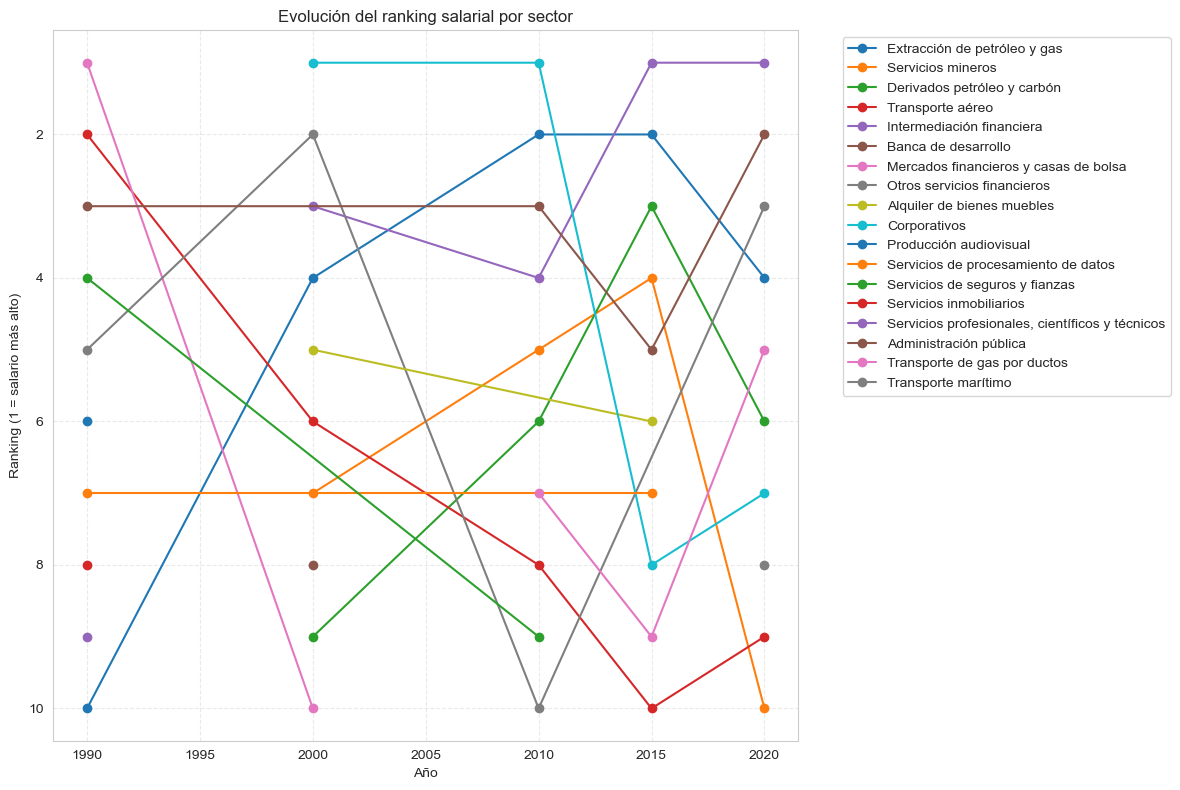

In [57]:
#gráfico de sectores con salarios más altos
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que uniste los 5 años en una base llamada "ranks_full"
# y que Rank más bajo = mejor salario (1 = mejor)
plt.figure(figsize=(12, 8))

# Dibujar líneas por sector
for sector in ranks_full['Sector'].unique():
    datos = ranks_full[ranks_full['Sector'] == sector].sort_values('Año')
    plt.plot(datos['Año'], datos['Rank'], marker='o', label=sector)

# Formato del gráfico
plt.gca().invert_yaxis()  # Porque menor rank = mejor posición
plt.title('Evolución del ranking salarial por sector')
plt.ylabel('Ranking (1 = salario más alto)')
plt.xlabel('Año')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\1580365163.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_year, x='SalRN1', y='Sector', palette='viridis')


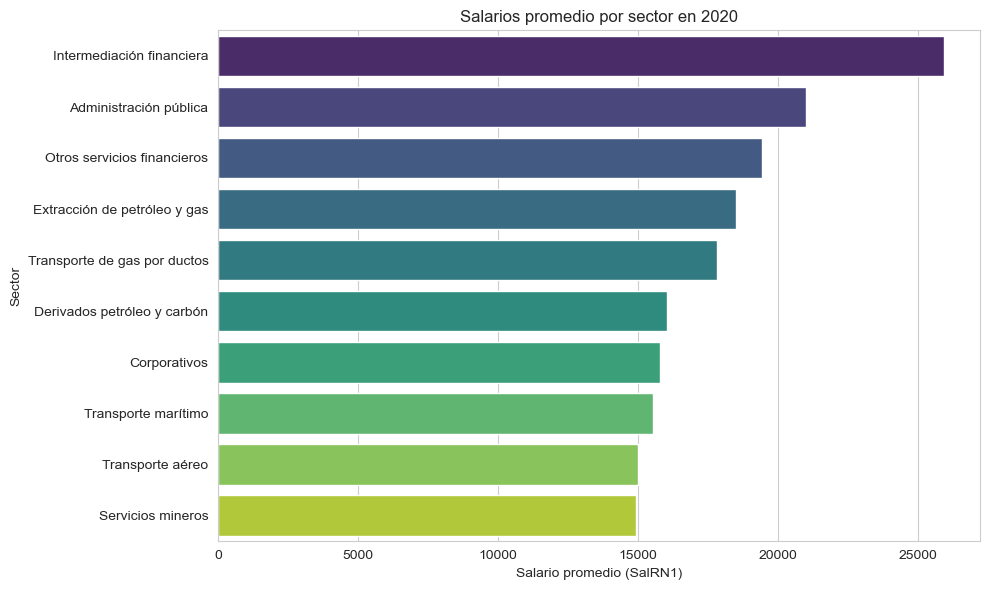

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar un año
año = 2020
df_year = ranks_full[ranks_full['Año'] == año].sort_values('Rank')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_year, x='SalRN1', y='Sector', palette='viridis')
plt.title(f"Salarios promedio por sector en {año}")
plt.xlabel("Salario promedio (SalRN1)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\3792239940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_year, x='SalRN1', y='Sector', palette='viridis')


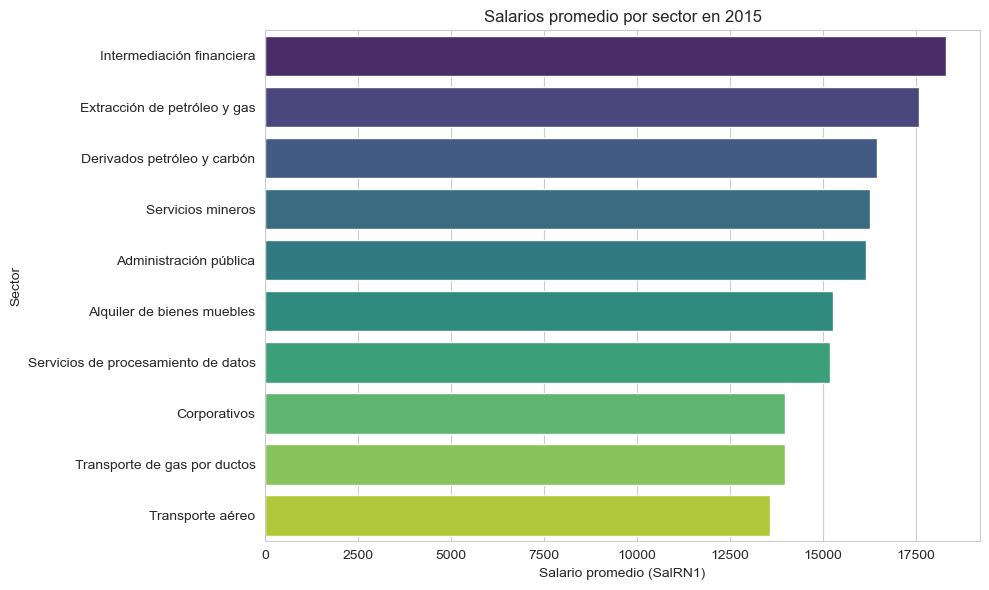

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar un año
año = 2015
df_year = ranks_full[ranks_full['Año'] == año].sort_values('Rank')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_year, x='SalRN1', y='Sector', palette='viridis')
plt.title(f"Salarios promedio por sector en {año}")
plt.xlabel("Salario promedio (SalRN1)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\2612655716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_year, x='SalRN1', y='Sector', palette='viridis')


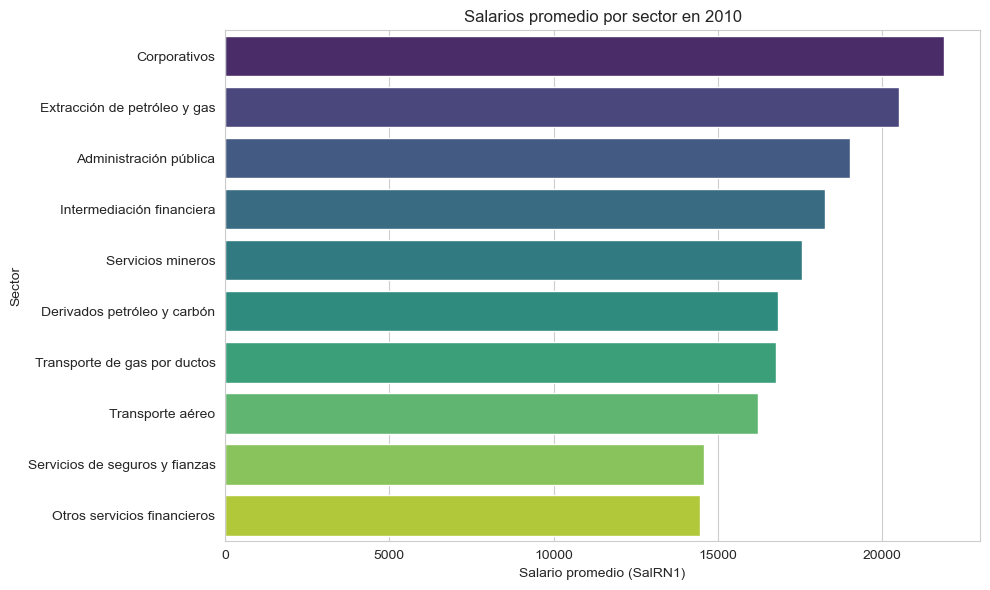

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar un año
año = 2010
df_year = ranks_full[ranks_full['Año'] == año].sort_values('Rank')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_year, x='SalRN1', y='Sector', palette='viridis')
plt.title(f"Salarios promedio por sector en {año}")
plt.xlabel("Salario promedio (SalRN1)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\622690246.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_year, x='SalRN1', y='Sector', palette='viridis')


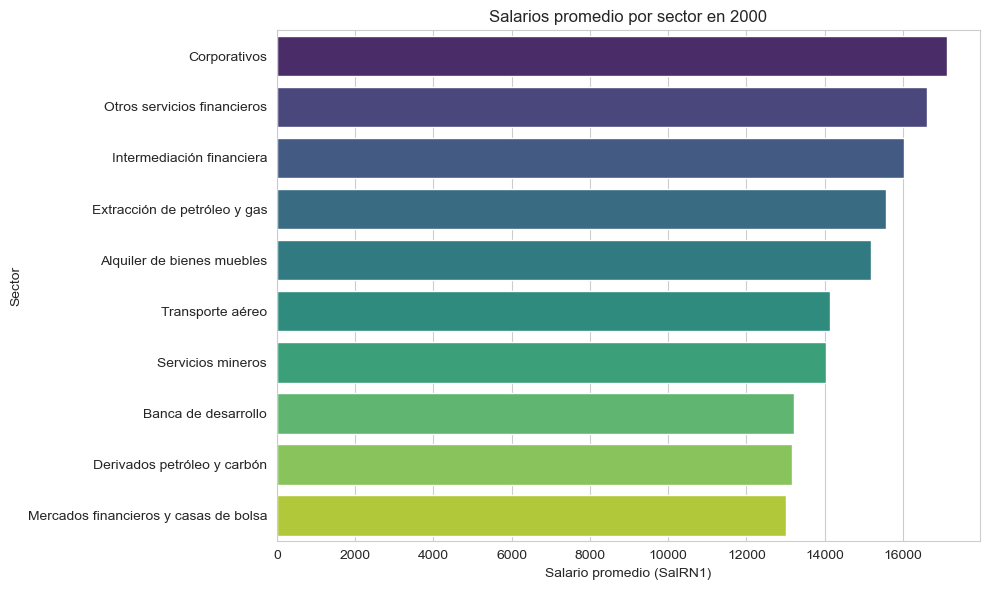

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar un año
año = 2000
df_year = ranks_full[ranks_full['Año'] == año].sort_values('Rank')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_year, x='SalRN1', y='Sector', palette='viridis')
plt.title(f"Salarios promedio por sector en {año}")
plt.xlabel("Salario promedio (SalRN1)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\2853024283.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_year, x='SalRN1', y='Sector', palette='viridis')


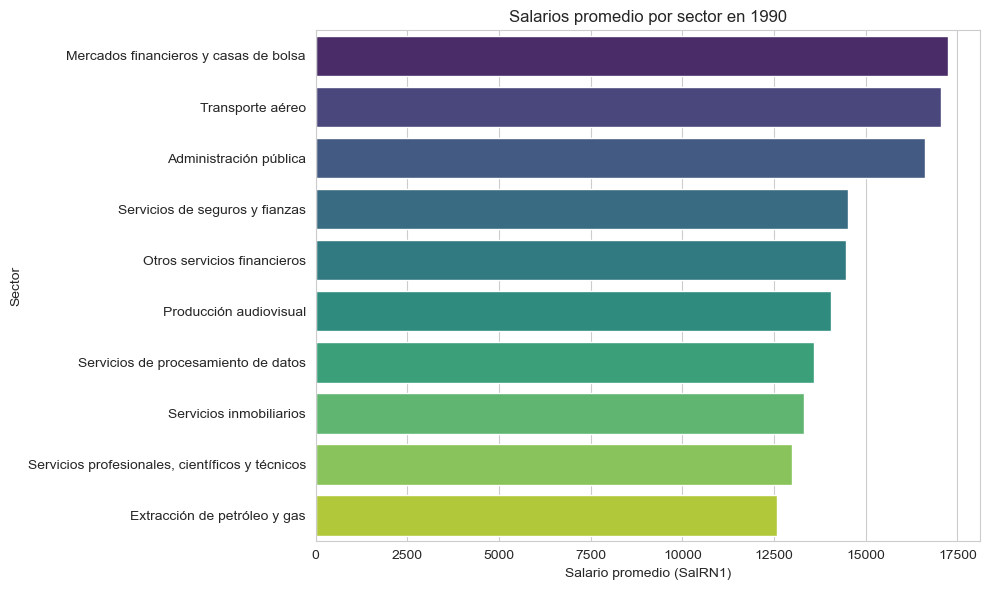

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar un año
año = 1990
df_year = ranks_full[ranks_full['Año'] == año].sort_values('Rank')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_year, x='SalRN1', y='Sector', palette='viridis')
plt.title(f"Salarios promedio por sector en {año}")
plt.xlabel("Salario promedio (SalRN1)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\840669551.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_year, x='SalRN1', y='Sector', ax=axes[i], palette='viridis')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\840669551.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_year, x='SalRN1', y='Sector', ax=axes[i], palette='viridis')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21384\840669551.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_year, x='SalRN1', y='Sector', ax=axes[i], palette='virid

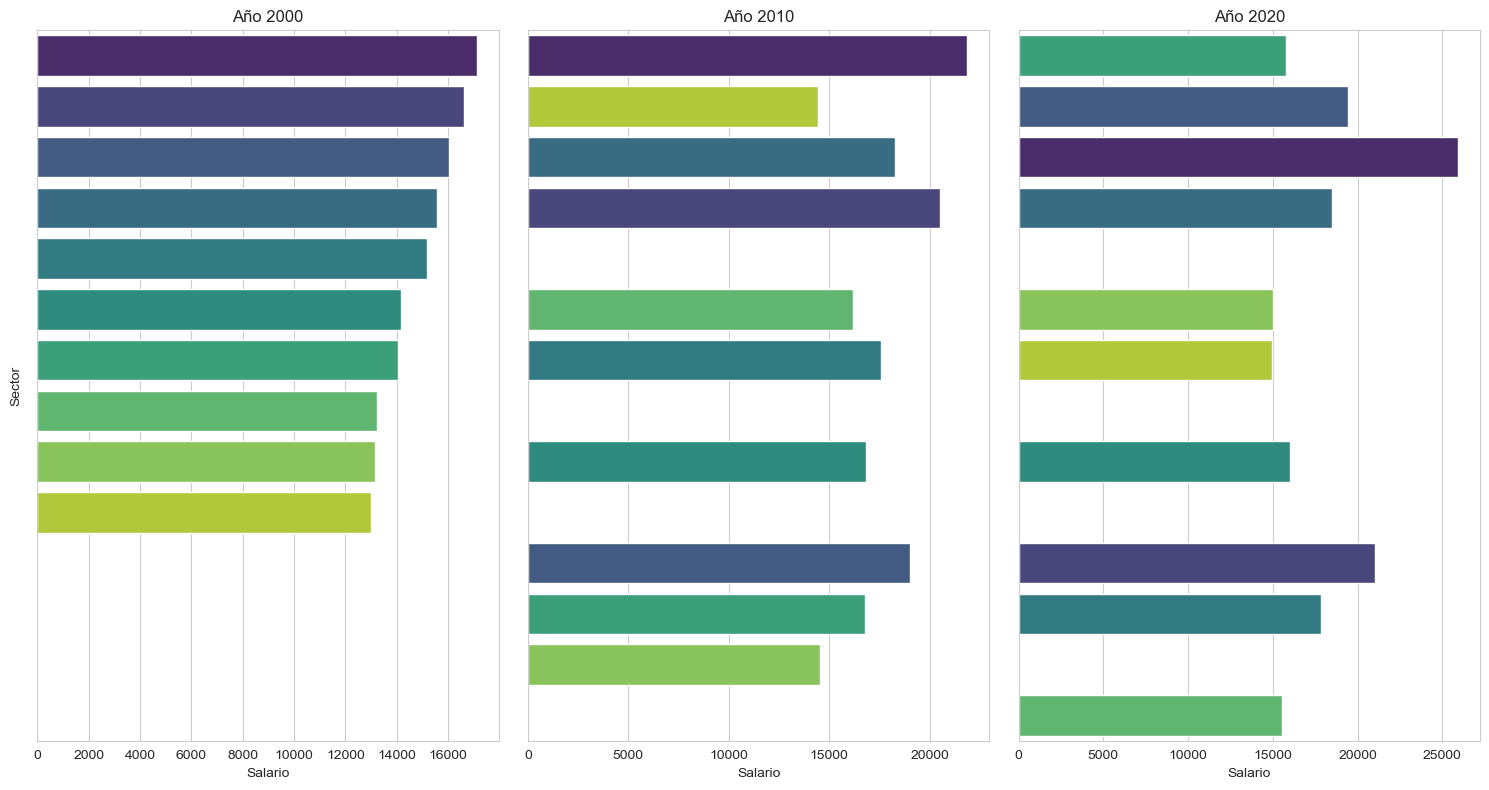

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Años que quieres comparar
años = [2000, 2010, 2020]
fig, axes = plt.subplots(nrows=1, ncols=len(años), figsize=(5 * len(años), 8), sharey=True)

for i, año in enumerate(años):
    df_year = ranks_full[ranks_full['Año'] == año].sort_values('Rank')
    sns.barplot(data=df_year, x='SalRN1', y='Sector', ax=axes[i], palette='viridis')
    axes[i].set_title(f"Año {año}")
    axes[i].set_xlabel("Salario")
    if i == 0:
        axes[i].set_ylabel("Sector")
    else:
        axes[i].set_ylabel("")
        axes[i].set_yticklabels([])

plt.tight_layout()
plt.savefig("salarios_por_sector_multianual.png", dpi=300)
plt.show()   

In [107]:
data_3 = pd.read_stata("C:/Users/Usuario/OneDrive/Escritorio/CIDE/Intro a ciencia de datos/Mercados de trabajo locales.dta")
data_3

,LLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,CLAVE_ENTIDAD_INEGI_CLAVE_DE_AGE,LLAVE_MUNICIPIO,CLAVE_MUNICIPIO_INEGI_CLAVE_DE_A,municipio,MERCADO_TRABAJO_LOCAL
0,1,Aguascalientes,1,17,1,Aguascalientes,1
1,1,Aguascalientes,1,18,2,Asientos,1
2,1,Aguascalientes,1,20,4,Cosío,1
3,1,Aguascalientes,1,21,5,Jesús María,1
4,1,Aguascalientes,1,22,6,Pabellón de Arteaga,1
...,...,...,...,...,...,...,...
2464,3,Baja California Sur,3,37,9,Loreto,773
2465,3,Baja California Sur,3,34,2,Mulegé,774
2466,3,Baja California Sur,3,35,3,La Paz,775
2467,3,Baja California Sur,3,36,8,Los Cabos,776
